## Homework 1: Programming with Python (2) 

### About this assignment:
The main purpose of this assignment is to check your programming knowledge in python. This assignment covers two python packages, `numpy` and `pandas`, which we'll be using throughout the course. For some of you, Python/numpy/pandas will be familiar; for others, it will be new. Either way, if you find this assignment very difficult then that could be a sign that you will struggle later on in the course. While BIOL-689 is a machine learning course rather than a programming course, programming will be an essential part of it.

Also, as part of this assignment you will likely need to consult the documentation for various Python packages we're using. This is, of course, totally OK and in fact strongly encouraged. Reading and interpreting documentation is an important skill, and in fact is one of the skills this assignment is meant to assess. 

Imports
------

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Points
------

Each question or sub-question will have a number of points allocated to it, which is indicated right below the question name. 

## Exercise 1: Loading files with Pandas
rubric={points: 1.5}

When working with tabular data, you will typically be creating Pandas dataframes by reading data from .csv files using `pd.read_csv()`. The documentation for this function is available [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).

In the "data" folder in this homework repository there are 6 different .csv files named `wine_#.csv/.txt`. Look at each of these files and use `pd.read_csv()` to load these data so that they resemble the following:

| Bottle | Grape | Origin | Alcohol | pH | Colour | Aroma |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| 1 |  Chardonnay | Australia | 14.23 | 3.51 | White | Floral |
| 2 |  Pinot Grigio | Italy | 13.20 | 3.30 | White | Fruity |
| 3 |  Pinot Blanc | France | 13.16 | 3.16 | White | Citrus |
| 4 |  Shiraz | Chile | 14.91 | 3.39 | Red | Berry |
| 5 |  Malbec | Argentina | 13.83 | 3.28 | Red | Fruity |

You are provided with tests that use `df.equals()` to check that all the dataframes are identical. If you're in a situation where the two dataframes look identical but `df.equals()` is returning `False`, it may be an issue of types - try checking `df.index`, `df.columns`, or `df.info()`.

Solution_1

In [222]:
df1 = pd.read_csv("hw1_data/wine_1.csv")
df2 = pd.read_csv("hw1_data/wine_2.csv")
df3 = pd.read_csv("hw1_data/wine_3.csv")
df4 = pd.read_csv("hw1_data/wine_4.txt", delimiter = '\t')
df5 = pd.read_csv("hw1_data/wine_5.csv")
df6 = pd.read_csv("hw1_data/wine_6.txt", delimiter = '\t')

In [ ]:
df2 = df2.rename(columns=df2.iloc[0]).drop(df2.index[0]).reset_index(drop=True)
df2['Bottle'] = pd.to_numeric(df2['Bottle'])
df2['Alcohol'] = pd.to_numeric(df2['Alcohol'])
df2['pH'] = pd.to_numeric(df2['pH'])

In [226]:
df3 = df3.drop([5,6])
df3['Bottle'] = pd.to_numeric(df3['Bottle'])

In [228]:
df5 = df5.drop('Add more columns', axis = 1)

In [230]:
df6 = df6.rename(columns=df6.iloc[0]).drop(df6.index[0]).reset_index(drop=True)
df6 = df6.drop('C', axis = 1)
df6 = df6.drop(df6.columns[7:9], axis = 1)
df6 = df6.drop([5,6])
df6['Bottle'] = pd.to_numeric(df6['Bottle'])
df6['Alcohol'] = pd.to_numeric(df6['Alcohol'])
df6['pH'] = pd.to_numeric(df6['pH'])

In [231]:
for i, df in enumerate([df2, df3, df4, df5, df6]):
    assert df1.equals(df), f"df1 not equal to df{i + 2}"
print("All tests passed.")

All tests passed.


<br><br>

## Exercise 2: The Titanic dataset

The file *titanic.csv* contains data of 1309 passengers who were on the Titanic's unfortunate voyage. For each passenger, the following data are recorded:

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)

In this exercise you will perform a number of wrangling operations to manipulate and extract subsets of the data.

_Note: many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

<br><br>

#### 2(a)
rubric={points: 0.5}

Load the `titanic.csv` dataset into a pandas dataframe named `titanic_df`.

<div class="alert alert-warning">

Solution_2(a)
    
</div>

In [23]:
titanic_df = pd.read_csv("hw1_data/titanic.csv")



In [25]:
assert set(titanic_df.columns) == set(
    [
        "pclass",
        "survived",
        "name",
        "sex",
        "age",
        "sibsp",
        "parch",
        "ticket",
        "fare",
        "cabin",
        "embarked",
        "boat",
        "body",
        "home.dest",
    ]
), "All required columns are not present"
assert len(titanic_df.index) == 1309, "Wrong number of rows in dataframe"
print("Success")

Success


<br><br>

#### 2(b)
rubric={points: 0.5}

The column names `sibsp` and `parch` are not very descriptive. Use `df.rename()` to rename these columns to `siblings_spouses` and `parents_children` respectively.

<div class="alert alert-warning">

Solution_2(b)
    
</div>

In [27]:
titanic_df = titanic_df.rename(columns={"sibsp": "siblings_spouses", "parch": "parents_children"})

In [29]:
assert set(["siblings_spouses", "parents_children"]).issubset(
    titanic_df.columns
), "Column names were not changed properly"
print("Success")

Success


<br><br>

#### 2(c)
rubric={points: 0.5}

We will practice indexing different subsets of the dataframe in the following questions.

Select the column `age` using single bracket notation `[]`. What type of object is returned?

<div class="alert alert-warning">

Solution_2(c)
    
</div>

In [235]:
titanic_df["age"]
#series

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

<br><br>

#### 2(d)
rubric={points: 0.5}

Now select the `age` using double bracket notation `[[]]`. What type of object is returned?

<div class="alert alert-warning">

Solution_2(d)
    
</div>

In [233]:
titanic_df[["age"]]
#dataframe

,age
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
...,...
1304,14.5000
1305,NaN
1306,26.5000
1307,27.0000


<br><br>

#### 2(e)
rubric={points: 0.5}

Select the columns `pclass`, `survived`, and `age` using a single line of code.

<div class="alert alert-warning">

Solution_2(e)
    
</div>

In [34]:
titanic_df.loc[:, ['survived', 'pclass', 'age']]

,survived,pclass,age
0,1,1,29.0000
1,1,1,0.9167
2,0,1,2.0000
3,0,1,30.0000
4,0,1,25.0000
...,...,...,...
1304,0,3,14.5000
1305,0,3,NaN
1306,0,3,26.5000
1307,0,3,27.0000


<br><br>

#### 2(f)
rubric={points: 0.5}

Use the `iloc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

<div class="alert alert-warning">

Solution_2(f)
    
</div>

In [49]:
titanic_df.iloc[0:5, 2:5]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


<br><br>

#### 2(g)
rubric={points: 0.5}

Now use the `loc` method to obtain the first 5 rows of the columns `name`, `sex` and `age` using a single line of code.

<div class="alert alert-warning">

Solution_2(g)
    
</div>

In [48]:
titanic_df.loc[0:4, ['name', 'sex', 'age']]

,name,sex,age
0,"Allen, Miss. Elisabeth Walton",female,29.0000
1,"Allison, Master. Hudson Trevor",male,0.9167
2,"Allison, Miss. Helen Loraine",female,2.0000
3,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


<br><br>

#### 2(h)
rubric={points: 0.5}

How many passengers survived (`survived = 1`) the disaster? Hint: try using `df.query()` or `[]` notation to subset the dataframe and then `df.shape` to check its size.

<div class="alert alert-warning">

Solution_2(h)
    
</div>

In [54]:
Survive_df = titanic_df.query('survived == 1')
Survive_df.shape
#500 survived

(500, 14)

<br><br>

#### 2(i)
rubric={points: 0.5}

How many passengers that survived the disaster (`survived = 1`) were over 60 years of age?

<div class="alert alert-warning">

Solution_2(i)
    
</div>

In [57]:
Sixty_df = Survive_df.query('age > 60')
Sixty_df.shape
#8 people over 60 survived

(8, 14)

<br><br>

#### 2(j)
rubric={points: 0.5}

What was the lowest and highest fare paid to board the titanic? Store your answers as floats in the variables `lowest` and `highest`.

<div class="alert alert-warning">

Solution_2(j)
    
</div>

In [62]:
lowest = titanic_df['fare'].min()
highest = titanic_df['fare'].max()
print('Lowest = ', lowest, ', Highest = ', highest)

Lowest =  0.0 , Highest =  512.3292


<br><br>

#### 2(k)
rubric={points: 0.5}

Sort the dataframe by fare paid (most to least).

<div class="alert alert-warning">

Solution_2(k)
    
</div>

In [64]:
sorted_df = titanic_df.sort_values(by='fare')

<br><br>

#### 2(l)
rubric={points: 0.5}

Save the sorted dataframe to a .csv file called 'titanic_fares.csv' using `to_csv()`.

<div class="alert alert-warning">

Solution_2(l)
    
</div>

In [65]:
sorted_df.to_csv('titanic_fares.csv')

<br><br>

#### 2(m)
rubric={points: 0.5}

Create a scatter plot of fare (y-axis) vs. age (x-axis). You are welcome to use pandas built-in plotting or `matplotlib`. 

<div class="alert alert-warning">

Solution_2(m)
    
</div>

<Axes: xlabel='age', ylabel='fare'>

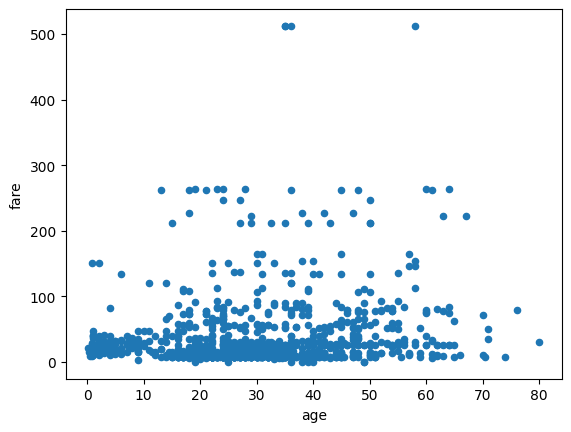

In [66]:
titanic_df.plot.scatter(x = 'age', y = 'fare')

<br><br>

#### 2(n)
rubric={points: 0.5}

Create a histogram of `embarked` values. 

> Make sure to name the axes and give a title to your plot. 

<div class="alert alert-warning">

Solution_2(n)
    
</div>

<function matplotlib.pyplot.show(close=None, block=None)>

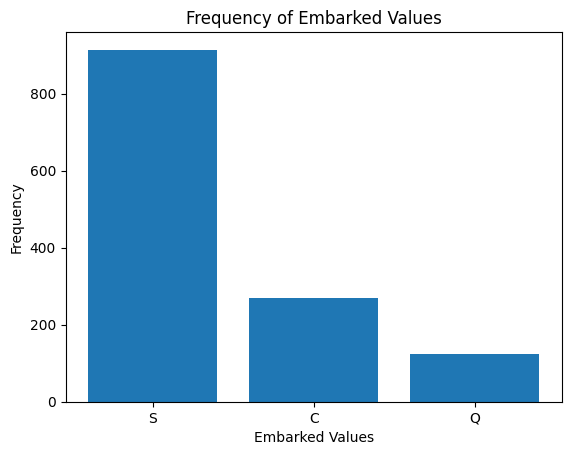

In [78]:
frequencies = titanic_df['embarked'].value_counts()
plt.bar(frequencies.index, frequencies.values)
plt.xlabel('Embarked Values')
plt.ylabel('Frequency')
plt.title('Frequency of Embarked Values')
plt.show

<br><br><br><br>

## Exercise 3: Treasure Hunt

In this exercise, we will generate various collections of objects either as a list, a tuple, or a dictionary. Your task is to inspect the objects and look for treasure, which in our case is a particular object: **the character "T"**. 

**Your tasks:**

For each of the following cases, index into the Python object to obtain the "T" (for Treasure). 

> Please do not modify the original line of code that generates `x` (though you are welcome to copy it). You are welcome to answer this question "manually" or by writing code - whatever works for you. However, your submission should always end with a line of code that prints out `'T'` at the end (because you've found it). 

In [3]:
import string

letters = string.ascii_uppercase

The first one is done for you as an example.

#### Example question

In [80]:
x = ("nothing", {-i: l for i, l in enumerate(letters)})
x

('nothing',
 {0: 'A',
  -1: 'B',
  -2: 'C',
  -3: 'D',
  -4: 'E',
  -5: 'F',
  -6: 'G',
  -7: 'H',
  -8: 'I',
  -9: 'J',
  -10: 'K',
  -11: 'L',
  -12: 'M',
  -13: 'N',
  -14: 'O',
  -15: 'P',
  -16: 'Q',
  -17: 'R',
  -18: 'S',
  -19: 'T',
  -20: 'U',
  -21: 'V',
  -22: 'W',
  -23: 'X',
  -24: 'Y',
  -25: 'Z'})

**Example answer**:

In [81]:
x[1][-19]

'T'

> Note: In these questions, the goal is not to understand the code itself, which may be confusing. Instead, try to probe the types of the various objects. For example `type(x)` reveals that `x` is a tuple, and `len(x)` reveals that it has two elements. Element 0 just contains "nothing", but element 1 contains more stuff, hence `x[1]`. Then we can again probe `type(x[1])` and see that it's a dictionary. If you `print(x[1])` you'll see that the letter "T" corresponds to the key -19, hence `x[1][-19]`.

<br><br>

#### 3(a)
rubric={points: 0.5}

In [82]:
# Do not modify this cell
x = [
    [letters[i] for i in range(26) if i % 2 == 0],
    [letters[i] for i in range(26) if i % 2 == 1],
]

<div class="alert alert-warning">

Solution_3(a)
    
</div>

In [87]:
x[1][9]

'T'

<br><br>

#### 3(b)
rubric={points: 0.5}

In [88]:
# Do not modify this cell
np.random.seed(1)
x = np.random.choice(list(set(letters) - set("T")), size=(100, 26), replace=True)
x[np.random.randint(100), np.random.randint(26)] = "T"

<div class="alert alert-warning">

Solution_3(b)
    
</div>

In [108]:
x[95][2]
    

'T'

<br><br>

#### 3(c)
rubric={points: 0.5}

In [4]:
# Do not modify this cell
n = 26
x = dict()
for i in range(n):
    x[string.ascii_lowercase[i]] = {
        string.ascii_lowercase[(j + 1) % n]: [[letters[j]] if j - 2 == i else None]
        for j in range(n)
    }

<div class="alert alert-warning">

Solution_3(c)
    
</div>

In [7]:
x['r']['u'][0][0]

'T'

<br><br><br><br>

![](eva-well-done.png)